# Predict of new dataset
***Steps***
1. Select bioactive compounds
2. Map them to the CLIPn space
3. neighbor checking

In [15]:
import sys

sys.path.append('/code')
import functions.multicellline_simulation as simulation
import matplotlib.pyplot as plt
from CLIPn_reorder_training.cell_clip import CLIPn
from clip.clip import CLIP
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import umap
from functions.compares import *
from functions.helper import *
from scipy.stats import zscore
import umap
import plotly.express as px
import pickle
import torch

In [16]:
with open('combined_data.pkl', 'rb') as f:
    data = pickle.load(f)

X = data['X']
y = data['y']

# Import profiles to predict

In [17]:
nci_info = pd.read_csv('../data_charles/data/NCI_cpnInfo.csv')
nci_data = pd.read_csv('../data_charles/data/NCI_cpnData.csv', header=None)
put_info = pd.read_csv('../data_charles/data/Prestwick_UTSW_cpnInfo.csv')
put_data = pd.read_csv('../data_charles/data/Prestwick_UTSW_cpnData.csv', header=None)


## Import pretrained model

In [18]:
with open('./result/z_clipn.pkl', 'rb') as f:
    z = pickle.load(f)

z_clipn = z['train']
z_predict = z['predict']

z_predict[3] = z_predict[3][nci_info.isHit == 1]
z_predict[4] = z_predict[4][put_info.isHit == 1]

In [19]:
# Define color map for categories

# label_color = sns.color_palette("tab20", 20) + sns.color_palette("gist_earth", 8) + sns.color_palette("gist_stern", 9)
data_color = ["#008585", "#f29f05", "#d50032", "#58508d", "#e04d01", "#fb91db", "#2117a8", "#fc9e55", "#59b6bf",
              "#ffefa8", "#b2b2b2", "#a30099", "#2d78ef"]
label_color = pd.read_excel('label_map.xlsx', header=0, index_col=None)
label_map = dict(zip(label_color.Name, label_color.Color))
data_map = dict(zip(range(13), data_color))


## Visualize the latent space

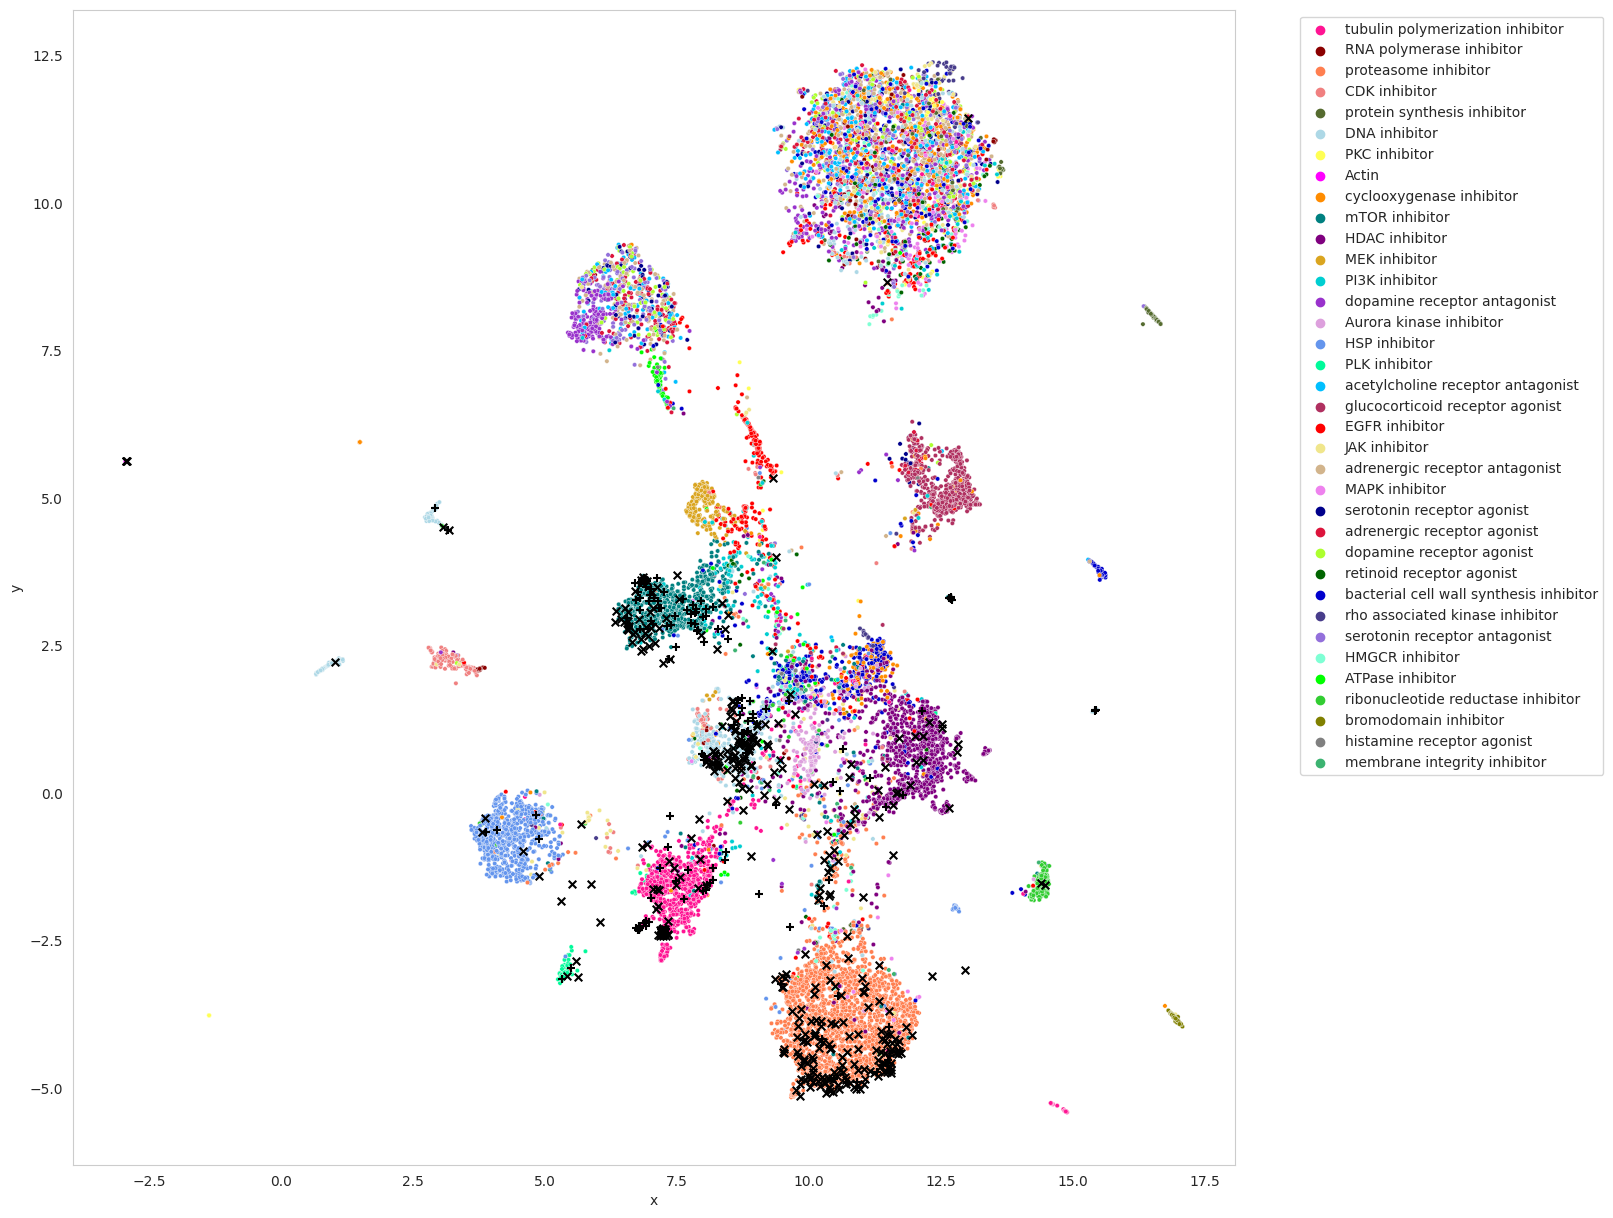

In [20]:
z_trans, label, id = dict_to_array(z_clipn, y)
# vectorized_mapping = np.vectorize(reverse_map.get)

# label = vectorized_mapping(label)

sns.set_style("whitegrid", {'axes.grid': False})
umap_ = umap.UMAP()

umap_.fit(z_trans)

embed = umap_.transform(z_trans)

plot_pd = pd.DataFrame({'x': embed[:, 0], 'y': embed[:, 1], 'label': label})

plt.figure(figsize=(15, 15))
sns.scatterplot(data=plot_pd, x='x', y='y', hue='label', palette=label_map, s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

embed_nci = umap_.transform(z_predict[3])
embed_put = umap_.transform(z_predict[4])
plt.scatter(embed_nci[:, 0], embed_nci[:, 1], s=30, c='black', marker='x', label='NCI')
plt.scatter(embed_put[:, 0], embed_put[:, 1], s=30, c='black', marker='+', label='PUT')
plt.show()

